<a href="https://colab.research.google.com/github/The7redarrow/ml-class/blob/master/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing relevant libraries needed 

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from keras.datasets import cifar10
from tensorflow.keras import layers, models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [80]:
#Importing training and testing datasets from keras datasets library
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train/255.0
X_test = X_test/255.0

Accuracy of the multiclassification depends on the balance of training dataset of the multiple class. Firstly let us identify if there in any class imbalance in the training dataset. 

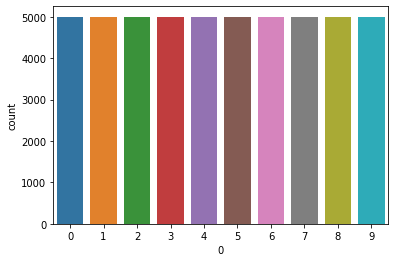

In [81]:
sns.countplot(x=0,data = pd.DataFrame(y_train))

It seems the dataset has 10 categorical labels labeled from 0-9. From the above countplot, it is clear that each class of the dataset has equal 
number of occurence in the training dataset. This will ensure that the trained model
won't have any bias towards particular class

Indentifying the Shape of the training dataset

In [82]:
print("shape of training datset",X_train.shape)
print("shape of test dataset",X_test.shape)

shape of training datset (50000, 32, 32, 3)
shape of test dataset (10000, 32, 32, 3)


Thies means there are 50000 and 10000 images of 32 by 32 size image with 3 color channel in
training data set and testing dataset respectively

Check if there is any missing entries in the datset

In [83]:
np.isnan(X_train).sum()

0

In [84]:
np.isnan(y_train).sum()

0

In [85]:
np.isnan(X_test).sum()

0

In [86]:
np.isnan(y_test).sum()

0

It seems there are no missing entries. This makes sense as this is handpicked image dataset

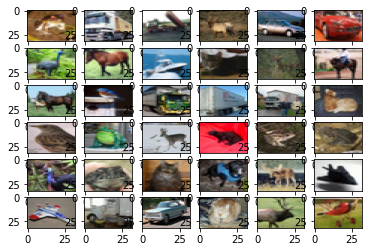

In [87]:
#Let us now visualize data by plotting first 100 images with labels
fig, ax = plt.subplots(6,6)
k = 0
 
for i in range(6):
    for j in range(6):
        ax[i][j].imshow(X_train[k], aspect='auto')
        k += 1
plt.show()

Lets convert the range of X_train and X_test values from 0-255 to 0-1 by dividing it with
255. Also, the labels are categorical values from 0-9 which needs to be one hot
encoded for sofmax immplementation.

In [88]:
from tensorflow.keras.utils import to_categorical 

# Normalize the data. Before we need to connvert data type to float for computation.
X_train = X_train/ 255.0
X_test  = X_test/ 255.0

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [89]:
# Let us define our base cnn model to see the base performance on the dataset.

In [90]:
# Defining Sequential model from keras library
model = Sequential()

#Adding convolutional layer with 32 filter and 3 by 3 padding
model.add(Conv2D(32, (3, 3), padding = 'SAME', input_shape = X_train.shape[1:]))
# Adding relu activation layer after convolution
model.add(Activation('relu'))
#Repeating convolution
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
# Adding pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))

#Flattening the network before final output layer
model.add(Flatten())
# Adding Dense fully connected nerual network layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
# Softmax layer for output layer
model.add(Activation('softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_34 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_35 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 7200)              0         
                                                      

In [91]:
from tensorflow import keras
from keras import optimizers
# defining optimizer with Adam optimization and learning rate of 0.001
opt = keras.optimizers.Adam(learning_rate = 0.001)

#Copiling the model with loss of as this is a multi-classification task
model.compile(loss = 'categorical_crossentropy',
             optimizer = opt,
             metrics = ['accuracy'])

In [92]:
#Fitting the defined model for first 10000 examples with batch size of 148 and
#epoch of 10. 
history = model.fit(X_train[0:10000], y_train[0:10000],
              batch_size=128,
              epochs=10,
              validation_data=(X_test, y_test),
              shuffle=True)

Epoch 1/10
79/79 [==============================] - 40s 496ms/step - loss: 1.8626 - accuracy: 0.3383 - val_loss: 1.5232 - val_accuracy: 0.4565
Epoch 2/10
79/79 [==============================] - 39s 493ms/step - loss: 1.3667 - accuracy: 0.5090 - val_loss: 1.3807 - val_accuracy: 0.5081
Epoch 3/10
79/79 [==============================] - 39s 489ms/step - loss: 1.1749 - accuracy: 0.5841 - val_loss: 1.3199 - val_accuracy: 0.5213
Epoch 4/10
79/79 [==============================] - 39s 496ms/step - loss: 1.0289 - accuracy: 0.6415 - val_loss: 1.3741 - val_accuracy: 0.5195
Epoch 5/10
79/79 [==============================] - 38s 484ms/step - loss: 0.8883 - accuracy: 0.6913 - val_loss: 1.2565 - val_accuracy: 0.5739
Epoch 6/10
79/79 [==============================] - 38s 481ms/step - loss: 0.7374 - accuracy: 0.7460 - val_loss: 1.2682 - val_accuracy: 0.5758
Epoch 7/10
79/79 [==============================] - 38s 487ms/step - loss: 0.6201 - accuracy: 0.7873 - val_loss: 1.3764 - val_accuracy: 0.5571

# Let us plot loss and accuracy vs number of epochs

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


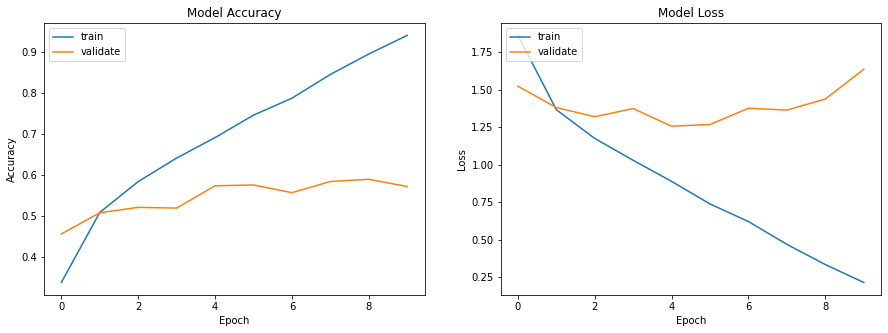

In [93]:
def plotmodelhistory(history):
    fig, ax = plt.subplots(1, 2, figsize = (15, 5))
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['train', 'validate'], loc = 'upper left')
    
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['train', 'validate'], loc = 'upper left')
    plt.show()
    
print(history.history.keys())

plotmodelhistory(history)

From the above plot it seems the training accuracy is steadily increasing but test accuracy has plateued. Also train loss seems to be much higher for test dataset. This suggest that the model is overfitting on the test data.

We might be able to fix the problem of overfitting by adding dropout layer. Also
we can try making model deeper with more layers inorder to increase the accuracy. Let us try improving the model by adding dropout layer and incresing model complexity

In [94]:
# Defining Sequential model from keras library
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = 'SAME', input_shape = X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding = 'SAME'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_38 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_39 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 32)        0         
                                                     

In [95]:
#Compiling the new model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [96]:
#Fitting new model
model.fit(X_train,y_train,epochs=10,validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 261s 167ms/step - loss: 1.5058 - accuracy: 0.4449 - val_loss: 1.1167 - val_accuracy: 0.5980
Epoch 2/10
1563/1563 [==============================] - 262s 167ms/step - loss: 1.0780 - accuracy: 0.6178 - val_loss: 0.9059 - val_accuracy: 0.6826
Epoch 3/10
1563/1563 [==============================] - 265s 170ms/step - loss: 0.9211 - accuracy: 0.6778 - val_loss: 0.8708 - val_accuracy: 0.6941
Epoch 4/10
1563/1563 [==============================] - 262s 167ms/step - loss: 0.8357 - accuracy: 0.7089 - val_loss: 0.7491 - val_accuracy: 0.7428
Epoch 5/10
1563/1563 [==============================] - 263s 168ms/step - loss: 0.7732 - accuracy: 0.7278 - val_loss: 0.6978 - val_accuracy: 0.7568
Epoch 6/10
1563/1563 [==============================] - 266s 170ms/step - loss: 0.7296 - accuracy: 0.7437 - val_loss: 0.6919 - val_accuracy: 0.7607
Epoch 7/10
1563/1563 [==============================] - 264s 169ms/step - loss: 0.6958 - accuracy: 0.7558 - val_

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


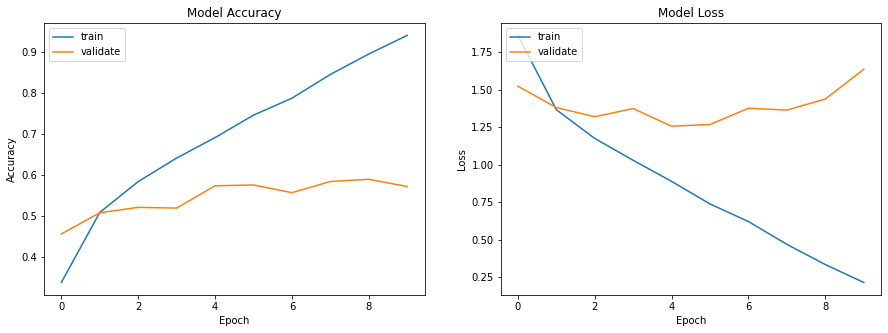

In [97]:
def plotmodelhistory(history):
    fig, ax = plt.subplots(1, 2, figsize = (15, 5))
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['train', 'validate'], loc = 'upper left')
    
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['train', 'validate'], loc = 'upper left')
    plt.show()
    
print(history.history.keys())

plotmodelhistory(history)

In [98]:
# Let us now analyze test prediction on our dataset

In [99]:
y_pred = model.predict(X_test)

313/313 [==============================] - 12s 38ms/step


In [100]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [101]:
print("Test accuracy for CNN model is",round(100*accuracy_score(y_pred.argmax(axis=1),y_test.argmax(axis=1)),2),'%')

Test accuracy for CNN model is 78.04 %


The improved cnn model has accuracy of 78.13%. This is an improvement from our 
base model

Now Plotting confusion matrix to visualize the model performance on different labels

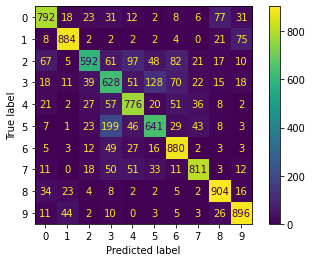

In [102]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()

It seems the model is predicting high percentage of true label of 5 as 3 as well as high number of true label of 3 as 5.

Plotting classification report of the model performance

In [103]:
print(classification_report(y_test.argmax(axis=1),y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1000
           1       0.89      0.88      0.89      1000
           2       0.80      0.59      0.68      1000
           3       0.57      0.63      0.60      1000
           4       0.73      0.78      0.75      1000
           5       0.72      0.64      0.68      1000
           6       0.77      0.88      0.82      1000
           7       0.86      0.81      0.83      1000
           8       0.84      0.90      0.87      1000
           9       0.84      0.90      0.87      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



From the calssification report of the prediction we can see that labe 3 and label 5
has comparatively low precision and recall which indicates hig number of false positive
and negatives respectively.